In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

# Step 1: Data Collection

In [3]:
df = pd.read_csv("used_cars.csv")
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [4]:
df.shape

(4009, 12)

In [5]:
df.duplicated().sum() #finding any duplicated rowa in the dataframe

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


# Step 2: Data Preprocessing and Feature Engineering

1. Handling the Missing Values

In [7]:
#We can see some null values in fuel_type, accident, and clean_title columns
df.isna().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [8]:
#finding the unique values in the column ful_type
df['fuel_type'].value_counts()

Gasoline          3309
Hybrid             194
E85 Flex Fuel      139
Diesel             116
–                   45
Plug-In Hybrid      34
not supported        2
Name: fuel_type, dtype: int64

In [9]:
df['fuel_type'].unique()

array(['E85 Flex Fuel', 'Gasoline', 'Hybrid', nan, 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

In [10]:
#Assuming the missing values are random and doesn't follow a specific patter or belong to a specific type of fuel
df['fuel_type'].fillna('Gasoline', inplace = True)
df.isna().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type         0
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [11]:
#Also replacing the '-', 'not supported' observations with 'Gasoline'
df['fuel_type'].replace({"–":"Gasoline"}, inplace = True)
df['fuel_type'].value_counts()

Gasoline          3524
Hybrid             194
E85 Flex Fuel      139
Diesel             116
Plug-In Hybrid      34
not supported        2
Name: fuel_type, dtype: int64

In [12]:
df['fuel_type'].unique()

array(['E85 Flex Fuel', 'Gasoline', 'Hybrid', 'Diesel', 'Plug-In Hybrid',
       'not supported'], dtype=object)

In [13]:
df['accident'].value_counts()

None reported                             2910
At least 1 accident or damage reported     986
Name: accident, dtype: int64

In [14]:
#As the ratio of None reported to Atleast 1 accident reported is 3:1, we are randomly filling NA 
#with a probabilistic ratio of 3:1 instead of Mode Imputation.

NA_count = df['accident'].isna().sum()              #counting the no.of NA to generate random NA
random_values = np.random.choice(['None reported', 'At least 1 accident or damage reported'], NA_count, p = [3/4, 1/4])

df['accident'].fillna(pd.Series(random_values, index = df.index[df['accident'].isna()]), inplace = True)

In [15]:
df.isna().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type         0
engine            0
transmission      0
ext_col           0
int_col           0
accident          0
clean_title     596
price             0
dtype: int64

In [16]:
df['clean_title'].unique()

array(['Yes', nan], dtype=object)

In [17]:
df['clean_title'].value_counts()

Yes    3413
Name: clean_title, dtype: int64

In [18]:
#As all the values are 'Yes', we shall fill the NA with 'No' because if we fill it with 'Yes',
#all the data in the column becomes meaningless

df['clean_title'].fillna('No', inplace = True)

In [19]:
df.isna().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

2. Categorical to Numerical Data

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     4009 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      4009 non-null   object
 10  clean_title   4009 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


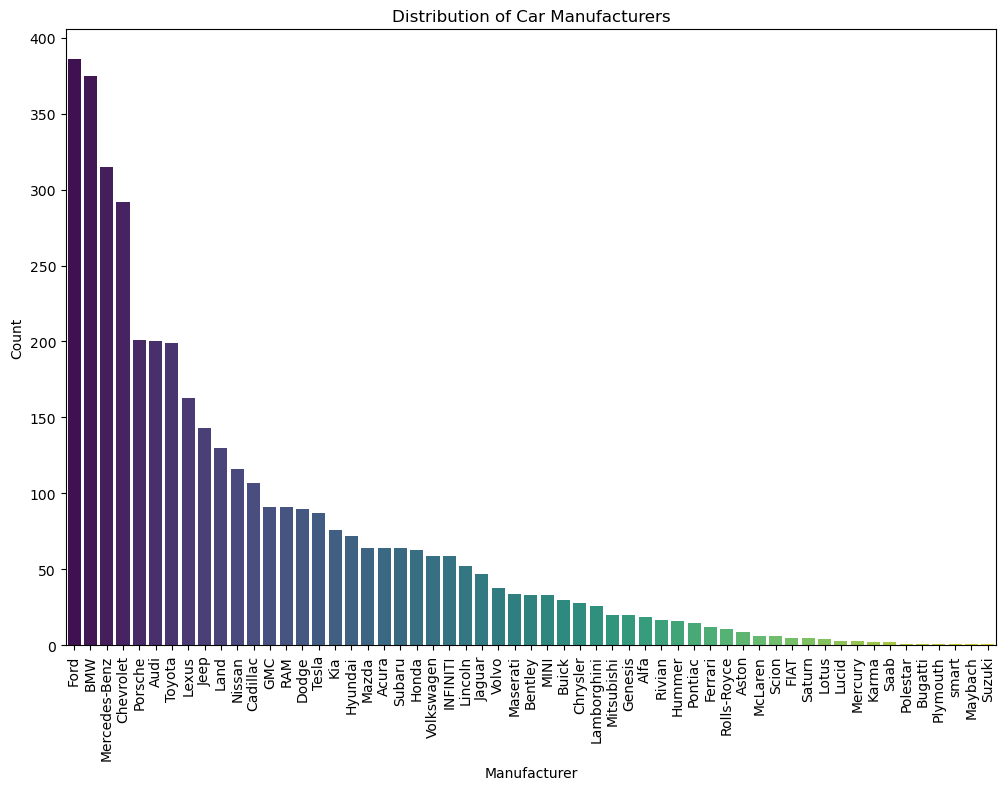

In [21]:
brands_count = df['brand'].value_counts()

#Histogram to check the number of observations per brand.

plt.figure(figsize=(12, 8))
sns.barplot(x=brands_count.index, y = brands_count.values,palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of Car Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.show()

In [22]:
df['price']=df['price'].astype(str)
df['price']=df['price'].str.replace("$","")
df["price"]=df["price"].str.replace(",","")
df["price"]=df["price"].astype(float)
df['price']

0        10300.0
1        38005.0
2        54598.0
3        15500.0
4        34999.0
          ...   
4004    349950.0
4005     53900.0
4006     90998.0
4007     62999.0
4008     40000.0
Name: price, Length: 4009, dtype: float64

In [23]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,No,54598.0
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,No,34999.0


In [24]:
df['brand'].value_counts()

Ford             386
BMW              375
Mercedes-Benz    315
Chevrolet        292
Porsche          201
Audi             200
Toyota           199
Lexus            163
Jeep             143
Land             130
Nissan           116
Cadillac         107
GMC               91
RAM               91
Dodge             90
Tesla             87
Kia               76
Hyundai           72
Mazda             64
Acura             64
Subaru            64
Honda             63
Volkswagen        59
INFINITI          59
Lincoln           52
Jaguar            47
Volvo             38
Maserati          34
Bentley           33
MINI              33
Buick             30
Chrysler          28
Lamborghini       26
Mitsubishi        20
Genesis           20
Alfa              19
Rivian            17
Hummer            16
Pontiac           15
Ferrari           12
Rolls-Royce       11
Aston              9
McLaren            6
Scion              6
FIAT               5
Saturn             5
Lotus              4
Lucid        

In [25]:
df['brand'].unique()

array(['Ford', 'Hyundai', 'Lexus', 'INFINITI', 'Audi', 'Acura', 'BMW',
       'Tesla', 'Land', 'Aston', 'Toyota', 'Lincoln', 'Jaguar',
       'Mercedes-Benz', 'Dodge', 'Nissan', 'Genesis', 'Chevrolet', 'Kia',
       'Jeep', 'Bentley', 'Honda', 'Lucid', 'MINI', 'Porsche', 'Hummer',
       'Chrysler', 'Volvo', 'Cadillac', 'Lamborghini', 'Maserati',
       'Volkswagen', 'Subaru', 'Rivian', 'GMC', 'RAM', 'Alfa', 'Ferrari',
       'Scion', 'Mitsubishi', 'Mazda', 'Saturn', 'Bugatti', 'Polestar',
       'Rolls-Royce', 'McLaren', 'Buick', 'Lotus', 'Pontiac', 'FIAT',
       'Karma', 'Saab', 'Mercury', 'Plymouth', 'smart', 'Maybach',
       'Suzuki'], dtype=object)

In [26]:
# Step 1: Find brands with less than 10 occurrences
brand_counts = df["brand"].value_counts()
rare_brands = brand_counts[brand_counts < 10].index  # Brands appearing < 10 times

# Step 2: Replace rare brands with "Other"
df["brand"] = df["brand"].replace(rare_brands, "Other")

# Step 3: Perform Target Encoding (Mean Price per Brand)
brand_encoded_values = df.groupby("brand")["price"].mean()

# Step 4: Map Encoded Values Back to Dataset
df["brand_encoded"] = df["brand"].map(brand_encoded_values)

# Print Final Encoded Values
print("\nFinal Encoded Brand Values:")
print(brand_encoded_values)


Final Encoded Brand Values:
brand
Acura             28034.078125
Alfa              37686.052632
Audi              39907.430000
BMW               41072.309333
Bentley          137553.545455
Buick             20357.666667
Cadillac          41670.728972
Chevrolet         36722.739726
Chrysler          13812.785714
Dodge             34500.544444
Ferrari          243790.666667
Ford              36240.880829
GMC               37525.681319
Genesis           43279.900000
Honda             21959.031746
Hummer            19618.062500
Hyundai           18946.875000
INFINITI          22927.644068
Jaguar            32362.723404
Jeep              31099.790210
Kia               28096.421053
Lamborghini      291233.846154
Land              55764.061538
Lexus             35668.521472
Lincoln           28330.884615
MINI              14157.636364
Maserati         140582.529412
Mazda             20011.062500
Mercedes-Benz     52075.765079
Mitsubishi        17550.650000
Nissan            25905.120690
Othe

In [27]:
# Compute brand-wise mean target encoding
brand_encoded_values = df.groupby("brand")["brand_encoded"].mean().astype(float)

# Print the encoded values for each brand
print("\nFinal Encoded Brand Values:")
print(brand_encoded_values)



Final Encoded Brand Values:
brand
Acura             28034.078125
Alfa              37686.052632
Audi              39907.430000
BMW               41072.309333
Bentley          137553.545455
Buick             20357.666667
Cadillac          41670.728972
Chevrolet         36722.739726
Chrysler          13812.785714
Dodge             34500.544444
Ferrari          243790.666667
Ford              36240.880829
GMC               37525.681319
Genesis           43279.900000
Honda             21959.031746
Hummer            19618.062500
Hyundai           18946.875000
INFINITI          22927.644068
Jaguar            32362.723404
Jeep              31099.790210
Kia               28096.421053
Lamborghini      291233.846154
Land              55764.061538
Lexus             35668.521472
Lincoln           28330.884615
MINI              14157.636364
Maserati         140582.529412
Mazda             20011.062500
Mercedes-Benz     52075.765079
Mitsubishi        17550.650000
Nissan            25905.120690
Othe

In [28]:
# Display brand encoding without scientific notation
pd.set_option("display.float_format", "{:.2f}".format)

# Print encoded values again
print("\nFinal Encoded Brand Values:")
print(brand_encoded_values)



Final Encoded Brand Values:
brand
Acura            28034.08
Alfa             37686.05
Audi             39907.43
BMW              41072.31
Bentley         137553.55
Buick            20357.67
Cadillac         41670.73
Chevrolet        36722.74
Chrysler         13812.79
Dodge            34500.54
Ferrari         243790.67
Ford             36240.88
GMC              37525.68
Genesis          43279.90
Honda            21959.03
Hummer           19618.06
Hyundai          18946.88
INFINITI         22927.64
Jaguar           32362.72
Jeep             31099.79
Kia              28096.42
Lamborghini     291233.85
Land             55764.06
Lexus            35668.52
Lincoln          28330.88
MINI             14157.64
Maserati        140582.53
Mazda            20011.06
Mercedes-Benz    52075.77
Mitsubishi       17550.65
Nissan           25905.12
Other           103781.76
Pontiac          13572.93
Porsche          88751.30
RAM              43029.16
Rivian           93138.18
Rolls-Royce     370992.73
Sub

In [29]:
df.drop(columns='brand', axis=1 , inplace=True)
df.drop(columns='model', axis=1 , inplace=True)

In [30]:
df.head(20)

,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,brand_encoded
0,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.00,36240.88
1,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.00,18946.88
2,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,No,54598.00,35668.52
3,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.00,22927.64
4,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,No,34999.00,39907.43
5,2016,"136,397 mi.",Gasoline,2.4 Liter,F,Silver,Ebony.,None reported,No,14798.00,28034.08
6,2017,"84,000 mi.",Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Black,None reported,Yes,31000.00,39907.43
7,2001,"242,000 mi.",Gasoline,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,A/T,Green,Green,None reported,Yes,7300.00,41072.31
8,2021,"23,436 mi.",Gasoline,311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,Black,Black,None reported,Yes,41927.00,35668.52
9,2020,"34,000 mi.",Gasoline,534.0HP Electric Motor Electric Fuel System,A/T,Black,Black,None reported,Yes,69950.00,48439.47


In [31]:
df["milage"] = df["milage"].astype(str)
df["milage"] = df["milage"].str.replace(" mi.","")
df["milage"] = df["milage"].str.replace(",","")
df["milage"] = df["milage"].astype(float)
df["milage"]

0      51000.00
1      34742.00
2      22372.00
3      88900.00
4       9835.00
         ...   
4004     714.00
4005   10900.00
4006    2116.00
4007   33000.00
4008   43000.00
Name: milage, Length: 4009, dtype: float64

In [32]:
import datetime
cur_data = datetime.datetime.now()
df['Age'] = cur_data.year - df['model_year']

In [33]:
df.drop(columns='model_year', axis=1 , inplace=True)
df.head()

,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,brand_encoded,Age
0,51000.00,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.00,36240.88,12
1,34742.00,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.00,18946.88,4
2,22372.00,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,No,54598.00,35668.52,3
3,88900.00,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.00,22927.64,10
4,9835.00,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,No,34999.00,39907.43,4


In [34]:
df["transmission"].unique()

array(['6-Speed A/T', '8-Speed Automatic', 'Automatic', '7-Speed A/T',
       'F', 'A/T', '8-Speed A/T', 'Transmission w/Dual Shift Mode',
       '9-Speed Automatic', '6-Speed M/T', '10-Speed A/T', '9-Speed A/T',
       '5-Speed A/T', '1-Speed A/T', 'Automatic CVT',
       '7-Speed Automatic with Auto-Shift', 'CVT-F', 'M/T',
       '6-Speed Automatic with Auto-Shift', '10-Speed Automatic',
       'CVT Transmission', '4-Speed A/T', '6-Speed Automatic',
       '4-Speed Automatic', '7-Speed M/T',
       '8-Speed Automatic with Auto-Shift', '5-Speed Automatic',
       '8-SPEED AT', '1-Speed Automatic', '5-Speed M/T', 'Manual',
       '6-Speed Manual', 'Variable', '2', '7-Speed Manual',
       'Automatic, 9-Spd 9G-Tronic', 'Automatic, 8-Spd',
       'Automatic, 8-Spd Sport w/Sport & Manual Modes', '–',
       'Auto, 6-Spd w/CmdShft', 'Transmission Overdrive Switch',
       '7-Speed Automatic', 'Automatic, 8-Spd PDK Dual-Clutch',
       'Automatic, 8-Spd M STEPTRONIC w/Drivelogic, Sport & Ma

In [35]:
transmission_mapping = {
    '6-Speed A/T': 'Automatic',
    '8-Speed Automatic': 'Automatic',
    'Automatic': 'Automatic',
    '7-Speed A/T': 'Automatic',
    'A/T': 'Automatic',
    '8-Speed A/T': 'Automatic',
    'Transmission w/Dual Shift Mode': 'Automatic',
    '9-Speed Automatic': 'Automatic',
    '10-Speed Automatic': 'Automatic',
    'Automatic CVT': 'CVT',
    'CVT Transmission': 'CVT',
    'CVT-F': 'CVT',
    '7-Speed Automatic': 'Automatic',
    '6-Speed M/T': 'Manual',
    '7-Speed M/T': 'Manual',
    '6-Speed Manual': 'Manual',
    '5-Speed M/T': 'Manual',
    'Manual': 'Manual',
    '7-Speed Manual': 'Manual',
    '8-Speed Manual': 'Manual',
    'M/T': 'Manual',
    '6-Speed Automatic with Auto-Shift': 'Automatic',
    '8-Speed Automatic with Auto-Shift': 'Automatic',
    '9-Speed Automatic with Auto-Shift': 'Automatic',
    '5-Speed Automatic': 'Automatic',
    '4-Speed A/T': 'Automatic',
    '4-Speed Automatic': 'Automatic',
    '10-Speed A/T': 'Automatic',
    '5-Speed A/T': 'Automatic',
    '1-Speed A/T': 'Automatic',
    '2-Speed Automatic': 'Automatic',
    '6-Speed Electronically Controlled Automatic with O': 'Automatic',
    'Single-Speed Fixed Gear': 'Automatic',
    '7-Speed DCT Automatic': 'Automatic',
    '8-SPEED AT': 'Automatic',
    '8-SPEED A/T': 'Automatic',
    '10-Speed Automatic with Overdrive': 'Automatic',
    'Automatic, 9-Spd 9G-Tronic': 'Automatic',
    'Automatic, 8-Spd': 'Automatic',
    'Automatic, 8-Spd Sport w/Sport & Manual Modes': 'Automatic',
    'Automatic, 8-Spd PDK Dual-Clutch': 'Automatic',
    'Automatic, 8-Spd M STEPTRONIC w/Drivelogic, Sport & Manual Modes': 'Automatic',
    'Automatic, 8-Spd Dual-Clutch': 'Automatic',
    '2-Speed A/T': 'Automatic',
    '6 Speed At/Mt': 'Manual',
    '6 Speed Mt': 'Manual',
    'Variable': 'Other',
    '2': 'Other',
    '–': 'Other',
    'CVT': 'Automatic',
    '9-Speed A/T': 'Automatic',
    '6-Speed Automatic': 'Automatic',
    '7-Speed Automatic with Auto-Shift': 'Automatic',
    '1-Speed Automatic': 'Automatic',
    'Other': 'Other',
    'Transmission Overdrive Switch': 'Automatic',
    'Manual, 6-Spd': 'Manual',
    'Auto, 6-Spd w/CmdShft': 'Automatic',
    '6-Speed': 'Manual',
    'Automatic, 10-Spd': 'Automatic',
    '7-Speed': 'Automatic',
    'Automatic, 7-Spd S tronic Dual-Clutch': 'Automatic',
    'SCHEDULED FOR OR IN PRODUCTION': 'Other',
    'F': 'Other',
    'CVT': 'Automatic'
}


df['transmission'] = df['transmission'].replace(transmission_mapping)

df['transmission'].value_counts()

Automatic    3520
Manual        375
CVT           100
Other          14
Name: transmission, dtype: int64

In [36]:
def simplify_transmission(transmission):
    if 'Automatic' in transmission:
        return 'Automatic'
    elif 'Manual' in transmission:
        return 'Manual'
    else :
        return 'Other'
df['transmission'] = df['transmission'].apply(simplify_transmission)
df['transmission'].value_counts()

Automatic    3520
Manual        375
Other         114
Name: transmission, dtype: int64

Extracting Horse power and Engine Size from Engine description

In [37]:
df['engine'].unique()

array(['300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capability',
       '3.8L V6 24V GDI DOHC', '3.5 Liter DOHC', ...,
       '136.0HP 1.8L 4 Cylinder Engine Gasoline Fuel',
       '270.0HP 2.0L 4 Cylinder Engine Gasoline Fuel',
       '420.0HP 5.9L 12 Cylinder Engine Gasoline Fuel'], dtype=object)

In [38]:
df['engine'].value_counts()

2.0L I4 16V GDI DOHC Turbo                               52
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel             48
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel             47
–                                                        45
300.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel    44
                                                         ..
323.0HP 6.0L 8 Cylinder Engine Gasoline Fuel              1
405.0HP 4.2L 8 Cylinder Engine Gasoline Fuel              1
353.0HP 6.0L 8 Cylinder Engine Gasoline Fuel              1
275.0HP 4.8L 8 Cylinder Engine Gasoline Fuel              1
420.0HP 5.9L 12 Cylinder Engine Gasoline Fuel             1
Name: engine, Length: 1146, dtype: int64

In [39]:
import re

def extract_engine_att(engine_str):
    horsepower = re.search(r'(\d+\.\d+)HP|\d+\.\d+', engine_str)
    displacement = re.search(r'(\d+\.\d+L|\d+\.\d+ Liter)', engine_str)
    return horsepower.group(1) if horsepower else '',\
           displacement.group(1) if displacement else ''


df[['Horsepower', 'Engine_Displacement']] = df['engine'].apply(extract_engine_att).apply(pd.Series)

In [40]:
df.drop('engine',axis=1,inplace=True)

In [41]:
df.head()

,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,brand_encoded,Age,Horsepower,Engine_Displacement
0,51000.00,E85 Flex Fuel,Automatic,Black,Black,At least 1 accident or damage reported,Yes,10300.00,36240.88,12,300.0,3.7L
1,34742.00,Gasoline,Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.00,18946.88,4,None,3.8L
2,22372.00,Gasoline,Automatic,Blue,Black,None reported,No,54598.00,35668.52,3,None,3.5 Liter
3,88900.00,Hybrid,Automatic,Black,Black,None reported,Yes,15500.00,22927.64,10,354.0,3.5L
4,9835.00,Gasoline,Automatic,Glacier White Metallic,Black,None reported,No,34999.00,39907.43,4,None,2.0L


In [42]:
df['Horsepower'].isna().sum()

707

In [43]:
df['Horsepower'] = pd.to_numeric(df['Horsepower'])
df['Horsepower'].fillna(df['Horsepower'].mean(),inplace=True)
df.head()

,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,brand_encoded,Age,Horsepower,Engine_Displacement
0,51000.00,E85 Flex Fuel,Automatic,Black,Black,At least 1 accident or damage reported,Yes,10300.00,36240.88,12,300.00,3.7L
1,34742.00,Gasoline,Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.00,18946.88,4,332.28,3.8L
2,22372.00,Gasoline,Automatic,Blue,Black,None reported,No,54598.00,35668.52,3,332.28,3.5 Liter
3,88900.00,Hybrid,Automatic,Black,Black,None reported,Yes,15500.00,22927.64,10,354.00,3.5L
4,9835.00,Gasoline,Automatic,Glacier White Metallic,Black,None reported,No,34999.00,39907.43,4,332.28,2.0L


In [44]:
df['Engine_Displacement'] = df['Engine_Displacement'].str.replace('L', '')
df['Engine_Displacement']

0            3.7
1            3.8
2       3.5 iter
3            3.5
4            2.0
          ...   
4004         6.0
4005         3.0
4006            
4007         3.5
4008         2.0
Name: Engine_Displacement, Length: 4009, dtype: object

In [45]:
#In observation #2 "iter should be removed"
df['Engine_Displacement'] = df['Engine_Displacement'].str.replace(' iter', '')
df['Engine_Displacement']

0       3.7
1       3.8
2       3.5
3       3.5
4       2.0
       ... 
4004    6.0
4005    3.0
4006       
4007    3.5
4008    2.0
Name: Engine_Displacement, Length: 4009, dtype: object

In [46]:
df['Engine_Displacement'] = pd.to_numeric(df['Engine_Displacement'])
df['Engine_Displacement'].isna().sum()

238

In [47]:
df['Engine_Displacement'].fillna(df['Engine_Displacement'].mean(), inplace = True)

Interior and Exterior color

In [48]:
df['ext_col'].value_counts()

Black                       905
White                       816
Gray                        496
Silver                      374
Blue                        349
                           ... 
Anthracite Blue Metallic      1
Moonlight Cloud               1
Silver Mist                   1
Cirrus Silver Metallic        1
C / C                         1
Name: ext_col, Length: 319, dtype: int64

In [49]:
df['int_col'].value_counts()

Black               2025
Beige                538
Gray                 472
Brown                157
–                    133
                    ... 
Almond Beige           1
Kyalami Orange         1
Sakhir Orange          1
Tan/Ebony              1
Black / Graphite       1
Name: int_col, Length: 156, dtype: int64

In [50]:
def base_color (df):
    base_colors= [
        'black', 'white', 'gray', 'silver', 'brown', 'red', 'blue', 'green',
         'orange', 'yellow']
    df['int_col'] = df['int_col'].str.lower()
    df['ext_col'] = df['ext_col'].str.lower()

    def find_color(text):
        for color in base_colors:
            if color in text :
                return color
        return 'other'    
        
    df['int_col'] = df['int_col'].apply(find_color)
    df['ext_col'] = df['ext_col'].apply(find_color)
    
    return df
df= base_color(df)


In [51]:
df.head()

,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,brand_encoded,Age,Horsepower,Engine_Displacement
0,51000.00,E85 Flex Fuel,Automatic,black,black,At least 1 accident or damage reported,Yes,10300.00,36240.88,12,300.00,3.70
1,34742.00,Gasoline,Automatic,other,gray,At least 1 accident or damage reported,Yes,38005.00,18946.88,4,332.28,3.80
2,22372.00,Gasoline,Automatic,blue,black,None reported,No,54598.00,35668.52,3,332.28,3.50
3,88900.00,Hybrid,Automatic,black,black,None reported,Yes,15500.00,22927.64,10,354.00,3.50
4,9835.00,Gasoline,Automatic,white,black,None reported,No,34999.00,39907.43,4,332.28,2.00


In [52]:
df['ext_col'].value_counts()

black     1016
white      922
gray       535
silver     421
blue       395
red        311
other      218
green       80
brown       44
orange      37
yellow      30
Name: ext_col, dtype: int64

In [53]:
df['int_col'].value_counts()

black     2155
other      862
gray       483
brown      163
red        134
white      131
blue        32
orange      23
silver      16
green        8
yellow       2
Name: int_col, dtype: int64

In [54]:
df.head()

,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,brand_encoded,Age,Horsepower,Engine_Displacement
0,51000.00,E85 Flex Fuel,Automatic,black,black,At least 1 accident or damage reported,Yes,10300.00,36240.88,12,300.00,3.70
1,34742.00,Gasoline,Automatic,other,gray,At least 1 accident or damage reported,Yes,38005.00,18946.88,4,332.28,3.80
2,22372.00,Gasoline,Automatic,blue,black,None reported,No,54598.00,35668.52,3,332.28,3.50
3,88900.00,Hybrid,Automatic,black,black,None reported,Yes,15500.00,22927.64,10,354.00,3.50
4,9835.00,Gasoline,Automatic,white,black,None reported,No,34999.00,39907.43,4,332.28,2.00


# Handling Outerliers

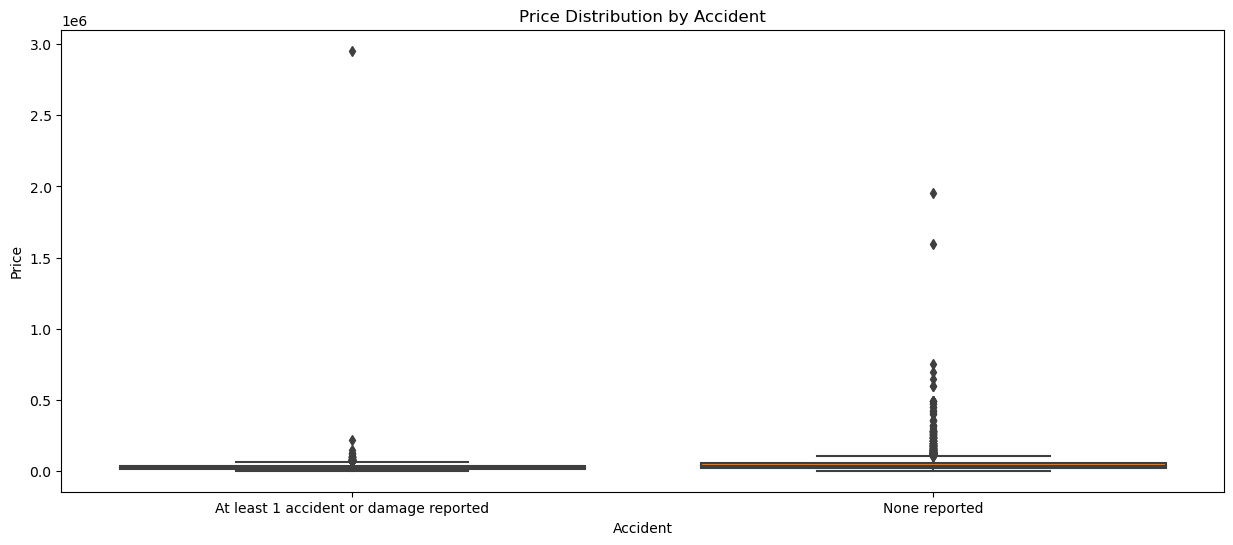

In [55]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df,x="accident",y="price")
plt.title("Price Distribution by Accident")
plt.xlabel("Accident")
plt.ylabel("Price")

plt.show()

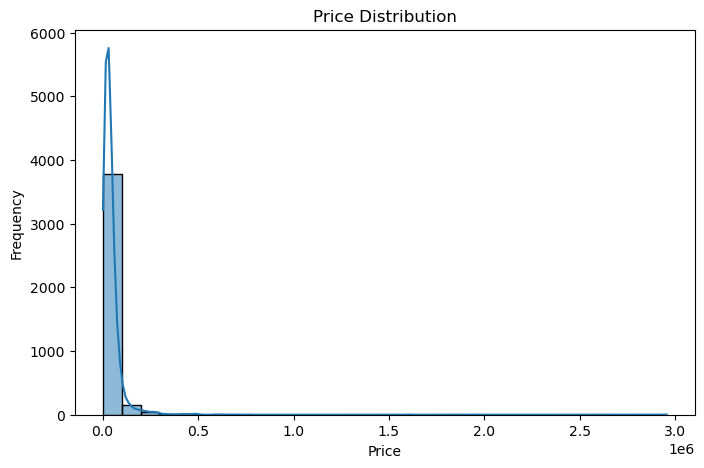

In [56]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=30, kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

Normalisation of the Price

In [57]:
#The price scale is very large, so let us use logarithmic normalisation
df['price'] = np.log10(df['price'])

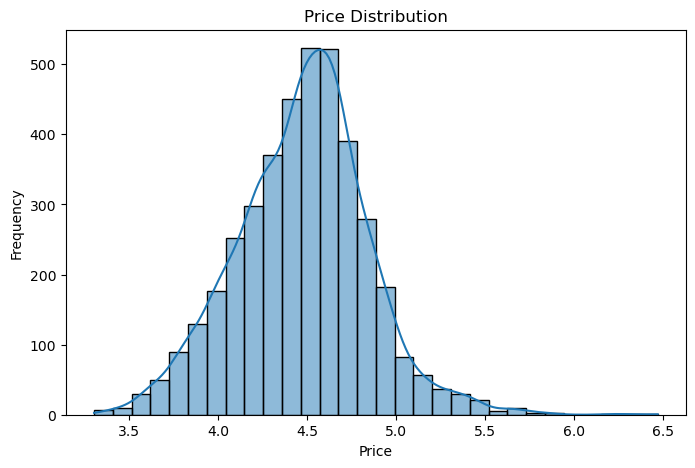

In [58]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=30, kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

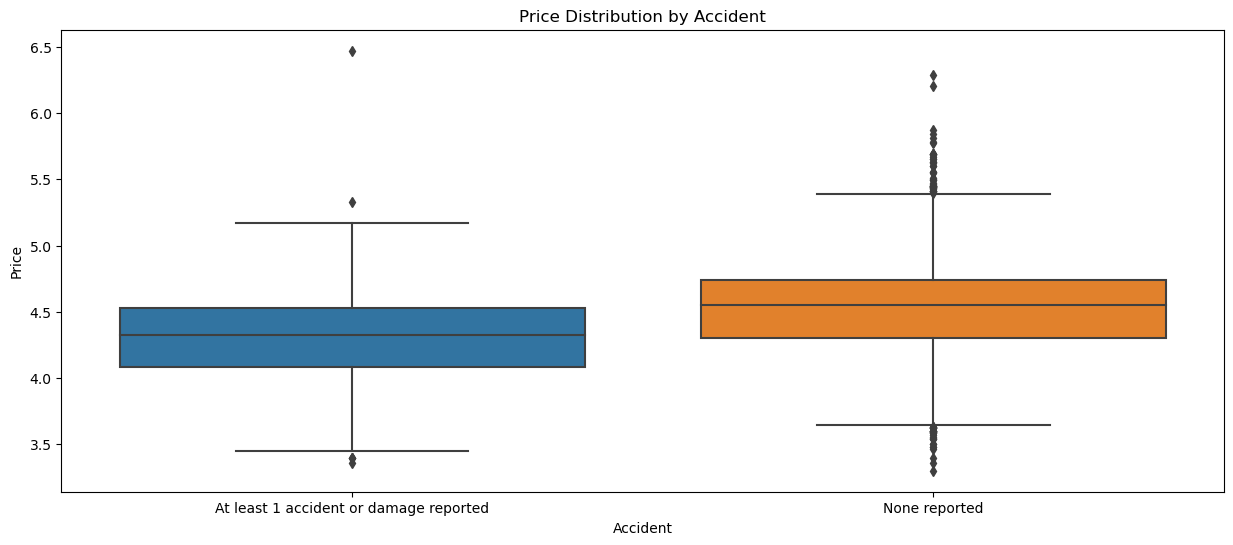

In [59]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df,x="accident",y="price")
plt.title("Price Distribution by Accident")
plt.xlabel("Accident")
plt.ylabel("Price")

plt.show()

In [60]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Age'] = np.where(df['Age'] < lower_bound, lower_bound, df['Age'])
df['Age'] = np.where(df['Age'] > upper_bound, upper_bound, df['Age'])

In [61]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['price'] = np.where(df['price'] < lower_bound, lower_bound, df['price'])
df['price'] = np.where(df['price'] > upper_bound, upper_bound, df['price'])

In [62]:
Q1 = df['milage'].quantile(0.25)
Q3 = df['milage'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['milage'] = np.where(df['milage'] < lower_bound, lower_bound, df['milage'])
df['milage'] = np.where(df['milage'] > upper_bound, upper_bound, df['milage'])

In [63]:
Q1 = df['Horsepower'].quantile(0.25)
Q3 = df['Horsepower'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Horsepower'] = np.where(df['Horsepower'] < lower_bound, lower_bound, df['Horsepower'])
df['Horsepower'] = np.where(df['Horsepower'] > upper_bound, upper_bound, df['Horsepower'])

In [64]:
Q1 = df['Engine_Displacement'].quantile(0.25)
Q3 = df['Engine_Displacement'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Engine_Displacement'] = np.where(df['Engine_Displacement'] < lower_bound, lower_bound, df['Engine_Displacement'])
df['Engine_Displacement'] = np.where(df['Engine_Displacement'] > upper_bound, upper_bound, df['Engine_Displacement'])

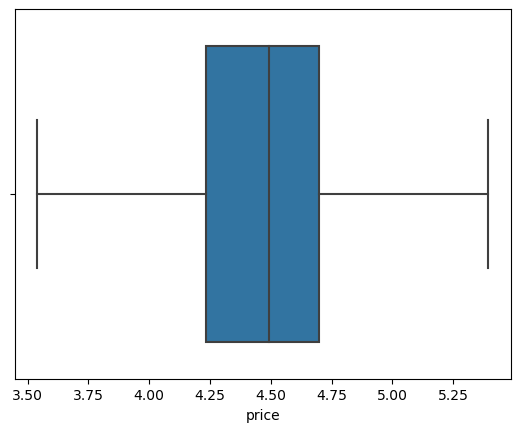

In [65]:
sns.boxplot(df["price"])
plt.show()

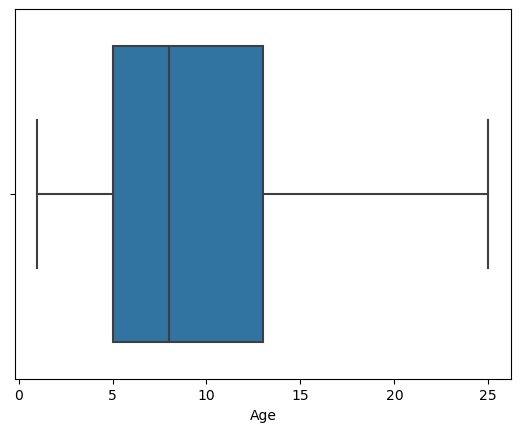

In [66]:
sns.boxplot(df["Age"])
plt.show()

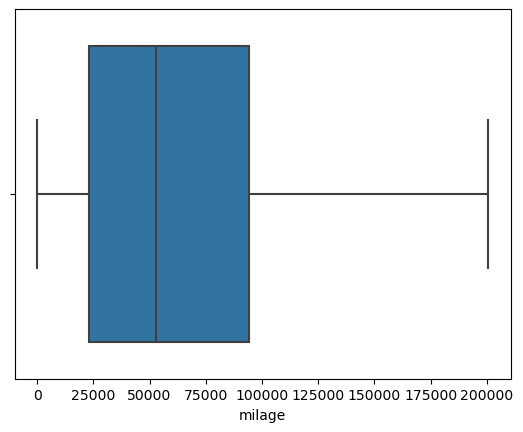

In [67]:
sns.boxplot(df["milage"])
plt.show()

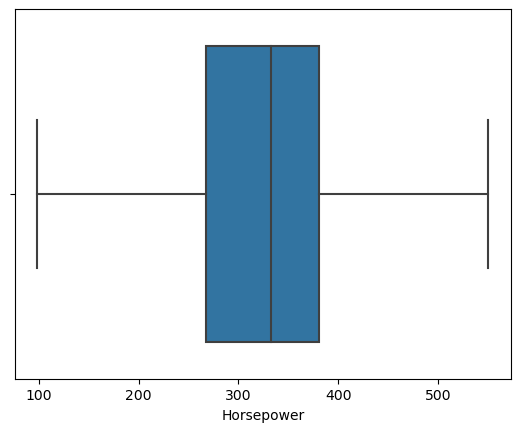

In [68]:
sns.boxplot(df["Horsepower"])
plt.show()

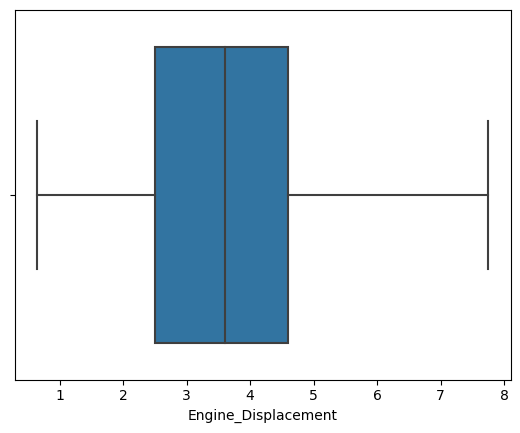

In [69]:
sns.boxplot(df["Engine_Displacement"])
plt.show()

Categorical to Encoding

In [70]:
df["clean_title"] = df["clean_title"].replace({"Yes":1,"No":0})
df.head()

,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,brand_encoded,Age,Horsepower,Engine_Displacement
0,51000.00,E85 Flex Fuel,Automatic,black,black,At least 1 accident or damage reported,1,4.01,36240.88,12.00,300.00,3.70
1,34742.00,Gasoline,Automatic,other,gray,At least 1 accident or damage reported,1,4.58,18946.88,4.00,332.28,3.80
2,22372.00,Gasoline,Automatic,blue,black,None reported,0,4.74,35668.52,3.00,332.28,3.50
3,88900.00,Hybrid,Automatic,black,black,None reported,1,4.19,22927.64,10.00,354.00,3.50
4,9835.00,Gasoline,Automatic,white,black,None reported,0,4.54,39907.43,4.00,332.28,2.00


In [71]:
df = pd.get_dummies(df, columns=['accident'], prefix='accident')
df.head()

,milage,fuel_type,transmission,ext_col,int_col,clean_title,price,brand_encoded,Age,Horsepower,Engine_Displacement,accident_At least 1 accident or damage reported,accident_None reported
0,51000.00,E85 Flex Fuel,Automatic,black,black,1,4.01,36240.88,12.00,300.00,3.70,1,0
1,34742.00,Gasoline,Automatic,other,gray,1,4.58,18946.88,4.00,332.28,3.80,1,0
2,22372.00,Gasoline,Automatic,blue,black,0,4.74,35668.52,3.00,332.28,3.50,0,1
3,88900.00,Hybrid,Automatic,black,black,1,4.19,22927.64,10.00,354.00,3.50,0,1
4,9835.00,Gasoline,Automatic,white,black,0,4.54,39907.43,4.00,332.28,2.00,0,1


In [72]:
df['transmission'] = df['transmission'].replace({'Other': 'Drop'})  # Renaming "Other" so it can be dropped
df = pd.get_dummies(df, columns=['transmission'], prefix='transmission')
df.drop(columns=['transmission_Drop'], inplace=True)  # Dropping "Other"
df.head()

,milage,fuel_type,ext_col,int_col,clean_title,price,brand_encoded,Age,Horsepower,Engine_Displacement,accident_At least 1 accident or damage reported,accident_None reported,transmission_Automatic,transmission_Manual
0,51000.00,E85 Flex Fuel,black,black,1,4.01,36240.88,12.00,300.00,3.70,1,0,1,0
1,34742.00,Gasoline,other,gray,1,4.58,18946.88,4.00,332.28,3.80,1,0,1,0
2,22372.00,Gasoline,blue,black,0,4.74,35668.52,3.00,332.28,3.50,0,1,1,0
3,88900.00,Hybrid,black,black,1,4.19,22927.64,10.00,354.00,3.50,0,1,1,0
4,9835.00,Gasoline,white,black,0,4.54,39907.43,4.00,332.28,2.00,0,1,1,0


In [73]:
from sklearn.preprocessing import LabelEncoder

In [74]:
le = LabelEncoder()
categorical_columns = ['fuel_type', 'ext_col', 'int_col']

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [75]:
df.head()

,milage,fuel_type,ext_col,int_col,clean_title,price,brand_encoded,Age,Horsepower,Engine_Displacement,accident_At least 1 accident or damage reported,accident_None reported,transmission_Automatic,transmission_Manual
0,51000.00,1,0,0,1,4.01,36240.88,12.00,300.00,3.70,1,0,1,0
1,34742.00,2,6,3,1,4.58,18946.88,4.00,332.28,3.80,1,0,1,0
2,22372.00,2,1,0,0,4.74,35668.52,3.00,332.28,3.50,0,1,1,0
3,88900.00,3,0,0,1,4.19,22927.64,10.00,354.00,3.50,0,1,1,0
4,9835.00,2,9,0,0,4.54,39907.43,4.00,332.28,2.00,0,1,1,0


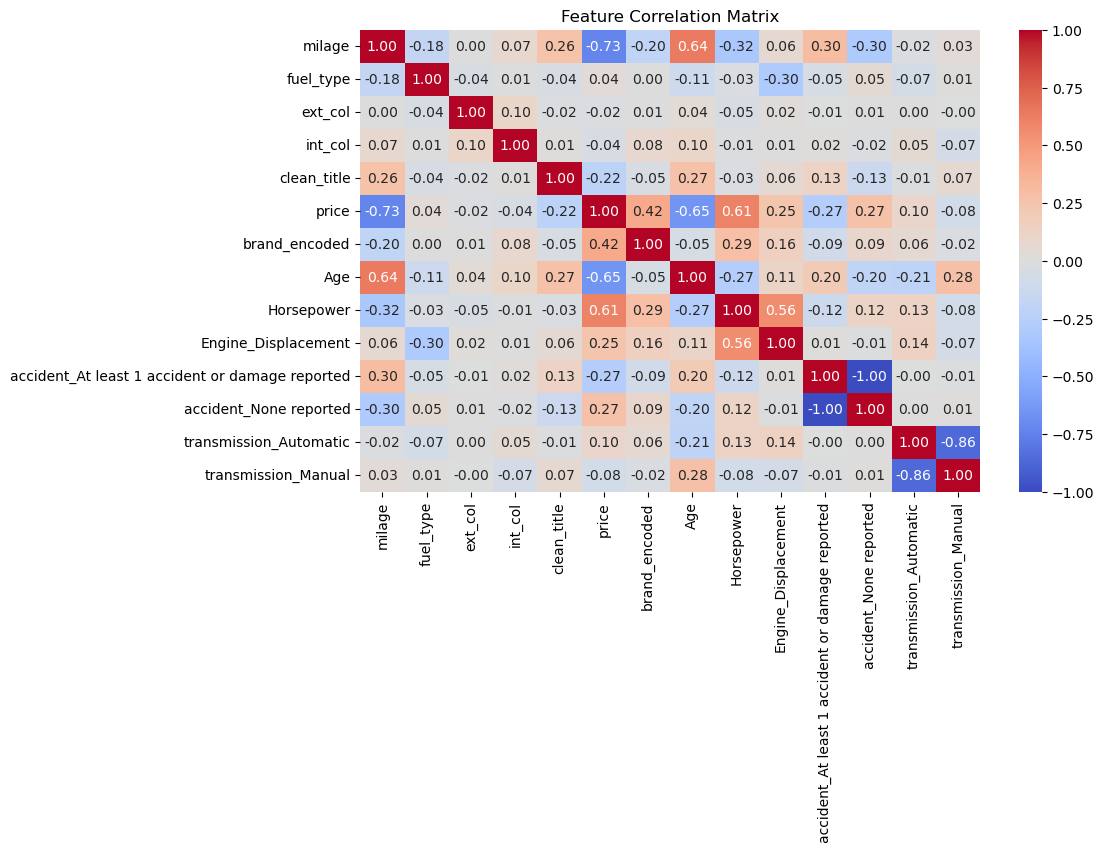

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [77]:
# Create the new feature
df['Horsepower_per_Liter'] = df['Horsepower'] / df['Engine_Displacement']

# Drop the original columns
df.drop(columns=['Horsepower', 'Engine_Displacement'], inplace=True)

# Verify the changes
df.head()

,milage,fuel_type,ext_col,int_col,clean_title,price,brand_encoded,Age,accident_At least 1 accident or damage reported,accident_None reported,transmission_Automatic,transmission_Manual,Horsepower_per_Liter
0,51000.00,1,0,0,1,4.01,36240.88,12.00,1,0,1,0,81.08
1,34742.00,2,6,3,1,4.58,18946.88,4.00,1,0,1,0,87.44
2,22372.00,2,1,0,0,4.74,35668.52,3.00,0,1,1,0,94.94
3,88900.00,3,0,0,1,4.19,22927.64,10.00,0,1,1,0,101.14
4,9835.00,2,9,0,0,4.54,39907.43,4.00,0,1,1,0,166.14


In [78]:
df.drop(columns=['int_col', 'ext_col'], inplace=True)

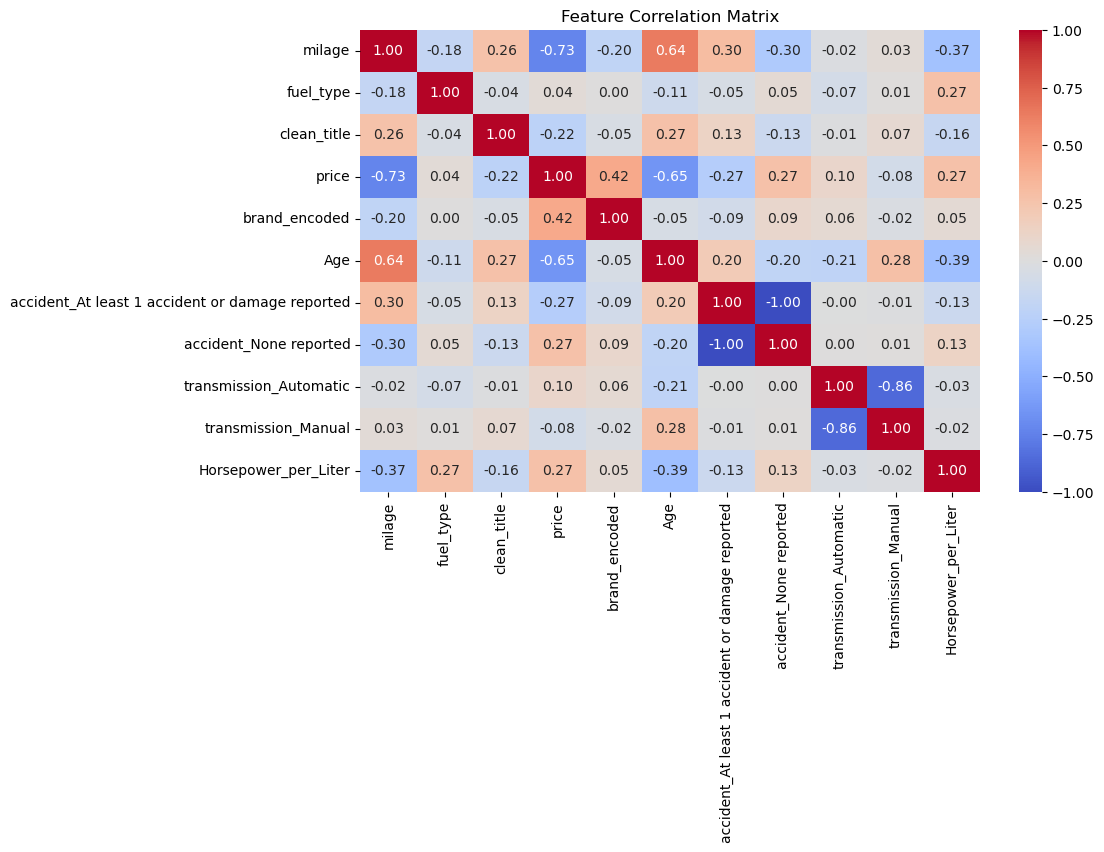

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Feature Scaling

In [81]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Selecting numeric columns for scaling (Price is already scaled)
num_cols = ['Age', 'milage', 'Horsepower_per_Liter']

scaler = StandardScaler()

# Applying Standard Scaling
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()

,milage,fuel_type,clean_title,price,brand_encoded,Age,accident_At least 1 accident or damage reported,accident_None reported,transmission_Automatic,transmission_Manual,Horsepower_per_Liter
0,-0.26,1,1,4.01,36240.88,0.44,1,0,1,0,-0.46
1,-0.59,2,1,4.58,18946.88,-0.92,1,0,1,0,-0.27
2,-0.83,2,0,4.74,35668.52,-1.09,0,1,1,0,-0.04
3,0.50,3,1,4.19,22927.64,0.10,0,1,1,0,0.15
4,-1.08,2,0,4.54,39907.43,-0.92,0,1,1,0,2.13


In [82]:
import pickle
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

# Step 3: Train Test Split

In [83]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [84]:
# Split the data into features and target variable
X = df.drop(columns=['price'])  # Features
y = df['price']  # Target variable

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Modelling

a. Ridge Regression Model

In [85]:
# Define Ridge Regression and hyperparameters for tuning
ridge_params = {'alpha': [0.1, 1, 10, 50, 100]}

ridge = Ridge()
grid_ridge = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2')
grid_ridge.fit(X_train, y_train)

# Best model & predictions
ridge_best = grid_ridge.best_estimator_

In [86]:
y_pred_ridge = ridge_best.predict(X_test)

In [87]:
# Evaluate Ridge Regression
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print(f"Best Ridge Alpha: {grid_ridge.best_params_['alpha']}")
print(f"Ridge Regression MAE: {ridge_mae}")
print(f"Ridge Regression MSE: {ridge_mse}")
print(f"Ridge Regression R²: {ridge_r2}")

Best Ridge Alpha: 1
Ridge Regression MAE: 0.1563154617591267
Ridge Regression MSE: 0.04051372331902499
Ridge Regression R²: 0.6940392844121102


      Actual  Predicted
2580    4.45       4.53
3660    3.77       4.20
897     4.61       4.52
2091    4.60       4.53
1044    4.89       4.67


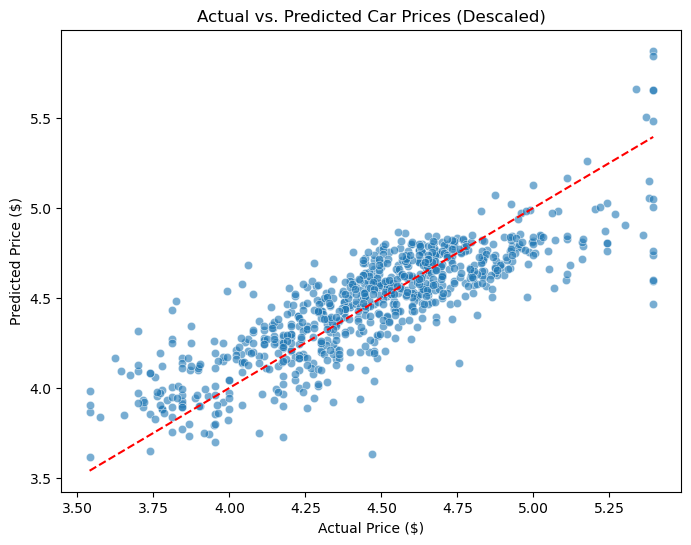

In [88]:
# Predict on test set
y_pred = ridge_best.predict(X_test)

# Create a DataFrame for comparison
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Print the first few rows
print(results_df.head())


# Plot actual vs. predicted values after descaling
plt.figure(figsize=(8,6))
sns.scatterplot(x=results_df['Actual'], y=results_df['Predicted'], alpha=0.6)
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()], 
         [results_df['Actual'].min(), results_df['Actual'].max()], 
         color='red', linestyle='--')  # Perfect fit line
plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.title("Actual vs. Predicted Car Prices (Descaled)")
plt.show()


In [89]:
# Reverse log10 transformation
results_df['Actual'] = 10 ** results_df['Actual']
results_df['Predicted'] = 10 ** results_df['Predicted']

# Print the first few rows
print(results_df.head(20))

       Actual  Predicted
2580 28000.00   33690.42
3660  5900.00   15682.59
897  41000.00   33352.72
2091 40250.00   34018.91
1044 77999.00   46540.84
2320 35899.00   26834.37
465  36000.00   47889.33
196  47214.00   51597.31
3113 30900.00   19424.41
3553 11000.00   12251.04
109  27000.00   31800.11
3230 30000.00   16110.04
2005 29999.00   29120.44
2463 37950.00   51474.14
2784 22500.00   14458.59
3788 15995.00   26249.26
1616 30490.00   36112.94
3838 79995.00   42400.14
2244  6499.00   18797.91
149  39999.00   33507.48


b. Random Forest Model

In [90]:
# Define Random Forest model & hyperparameters
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [91]:
rf = RandomForestRegressor(random_state=42)
grid_rf = GridSearchCV(rf, rf_params, cv=5, scoring='r2', n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Best model & predictions
rf_best = grid_rf.best_estimator_

In [92]:
y_pred_rf = rf_best.predict(X_test)

In [93]:
# Evaluate Random Forest
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print(f"Best Random Forest Parameters: {grid_rf.best_params_}")
print(f"Random Forest MAE: {rf_mae}")
print(f"Random Forest MSE: {rf_mse}")
print(f"Random Forest R²: {rf_r2}")

Best Random Forest Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest MAE: 0.12140138890976752
Random Forest MSE: 0.027642798043783057
Random Forest R²: 0.7912408542723165


c. XGBoost Regressor

In [94]:
params = { 'booster' : ['gbtree', 'gblinear','dart'],
            'n_estimators' : [1,2,3,4,5,6,7,8,9,10,15,20,30,40,50,60],
            'gamma' : [10,50,100,150,200,300,400,500,1000],
            'subsample' : [0.5,0.6,0.8,1],
            'tree_method' : ['auto', 'exact', 'approx', 'hist', 'gpu_hist'],
             'sampling_method' : ['uniform','gradient_based'],
              
              }

In [96]:
xg = xgb.XGBRegressor()
grid_xgb = GridSearchCV(xg, params, cv=5, scoring='r2', n_jobs=-1)
grid_xgb.fit(X_train, y_train)

NameError: name 'grid_xg' is not defined

In [97]:
# Best model & predictions
xg_best = grid_xgb.best_estimator_

In [98]:
y_pred_xg = xg_best.predict(X_test)

In [100]:
# Evaluate Random Forest
xgb_mae = mean_absolute_error(y_test, y_pred_xg)
xgb_mse = mean_squared_error(y_test, y_pred_xg)
xgb_r2 = r2_score(y_test, y_pred_xg)

print(f"Best XGB Parameters: {grid_xgb.best_params_}")
print(f"XGB MAE: {xgb_mae}")
print(f"XGB MSE: {xgb_mse}")
print(f"XGB R²: {xgb_r2}")

Best XGB Parameters: {'booster': 'gblinear', 'gamma': 10, 'n_estimators': 60, 'sampling_method': 'uniform', 'subsample': 0.5, 'tree_method': 'auto'}
XGB MAE: 0.15719765566633612
XGB MSE: 0.040820399640679135
XGB R²: 0.6917232566777967


      Actual  Predicted
2580    4.45       4.53
3660    3.77       4.20
897     4.61       4.53
2091    4.60       4.53
1044    4.89       4.67


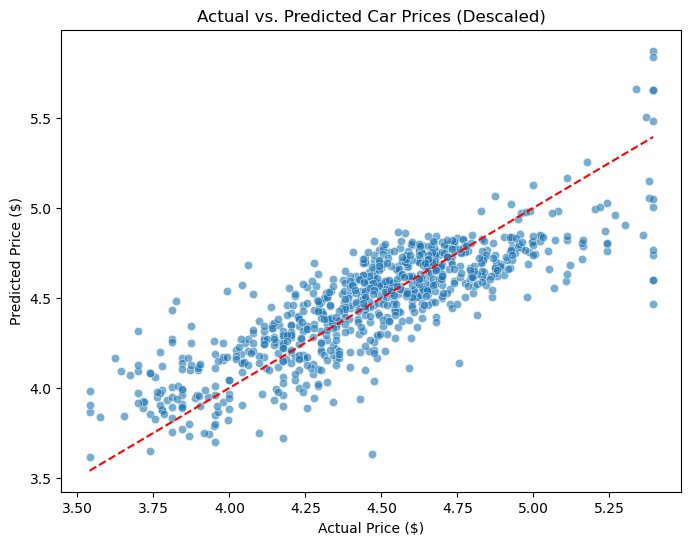

In [101]:
# Create a DataFrame for comparison
results_df_xgb = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xg})

# Print the first few rows
print(results_df_xgb.head())


# Plot actual vs. predicted values after descaling
plt.figure(figsize=(8,6))
sns.scatterplot(x=results_df_xgb['Actual'], y=results_df_xgb['Predicted'], alpha=0.6)
plt.plot([results_df_xgb['Actual'].min(), results_df_xgb['Actual'].max()], 
         [results_df_xgb['Actual'].min(), results_df_xgb['Actual'].max()], 
         color='red', linestyle='--')  # Perfect fit line
plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.title("Actual vs. Predicted Car Prices (Descaled)")
plt.show()


In [102]:
# Reverse log10 transformation
results_df_xgb['Actual'] = 10 ** results_df_xgb['Actual']
results_df_xgb['Predicted'] = 10 ** results_df_xgb['Predicted']

# Print the first few rows
print(results_df.head(20))

       Actual  Predicted
2580 28000.00   33690.42
3660  5900.00   15682.59
897  41000.00   33352.72
2091 40250.00   34018.91
1044 77999.00   46540.84
2320 35899.00   26834.37
465  36000.00   47889.33
196  47214.00   51597.31
3113 30900.00   19424.41
3553 11000.00   12251.04
109  27000.00   31800.11
3230 30000.00   16110.04
2005 29999.00   29120.44
2463 37950.00   51474.14
2784 22500.00   14458.59
3788 15995.00   26249.26
1616 30490.00   36112.94
3838 79995.00   42400.14
2244  6499.00   18797.91
149  39999.00   33507.48


# Step 5: Model Comparision

In [103]:
models = ['Ridge Regression', 'Random Forest', 'XgBoost']
mae_scores = [ridge_mae, rf_mae, xgb_mae]
mse_scores = [ridge_mse, rf_mse, xgb_mse]
r2_scores = [ridge_r2, rf_r2, xgb_r2]

# Print comparison
print("\nModel Comparison:")
for i, model in enumerate(models):
    print(f"{model} - MAE: {mae_scores[i]:.4f}, MSE: {mse_scores[i]:.4f}, R²: {r2_scores[i]:.4f}")



Model Comparison:
Ridge Regression - MAE: 0.1563, MSE: 0.0405, R²: 0.6940
Random Forest - MAE: 0.1214, MSE: 0.0276, R²: 0.7912
XgBoost - MAE: 0.1572, MSE: 0.0408, R²: 0.6917


# Predicted Vs Actual Prices

      Actual  Predicted
2580    4.45       4.54
3660    3.77       4.30
897     4.61       4.66
2091    4.60       4.51
1044    4.89       4.71


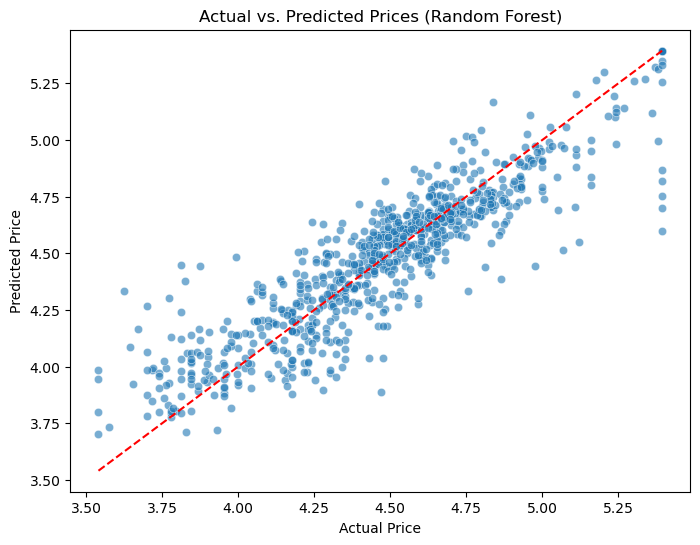

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test set
y_pred = rf_best.predict(X_test)

# Create a DataFrame for comparison
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Print the first few rows
print(results_df.head())

# Plot actual vs. predicted values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect fit line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Prices (Random Forest)")
plt.show()

       Actual  Predicted
2580 28000.00   34300.90
3660  5900.00   20049.24
897  41000.00   45956.89
2091 40250.00   32643.26
1044 77999.00   50920.34
2320 35899.00   34226.49
465  36000.00   42589.06
196  47214.00   49165.59
3113 30900.00   15073.28
3553 11000.00   10242.40
109  27000.00   27052.54
3230 30000.00   20034.28
2005 29999.00   37654.70
2463 37950.00   34723.08
2784 22500.00   13137.98
3788 15995.00   21028.85
1616 30490.00   34735.60
3838 79995.00   63831.83
2244  6499.00   17330.33
149  39999.00   30840.43


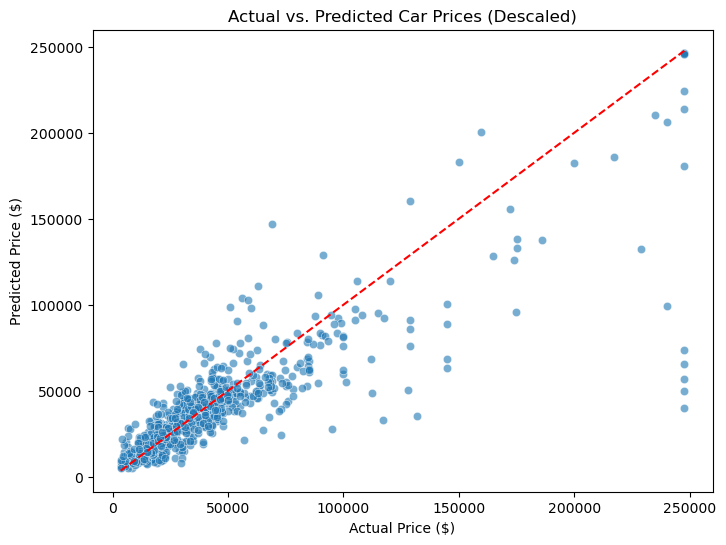

In [105]:
# Reverse log10 transformation
results_df['Actual'] = 10 ** results_df['Actual']
results_df['Predicted'] = 10 ** results_df['Predicted']

# Print the first few rows
print(results_df.head(20))

# Plot actual vs. predicted values after descaling
plt.figure(figsize=(8,6))
sns.scatterplot(x=results_df['Actual'], y=results_df['Predicted'], alpha=0.6)
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()], 
         [results_df['Actual'].min(), results_df['Actual'].max()], 
         color='red', linestyle='--')  # Perfect fit line
plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.title("Actual vs. Predicted Car Prices (Descaled)")
plt.show()


In [106]:
# Save the model and the scaler
import pickle
with open("used_car_price_model.pkl", "wb") as file:
    pickle.dump(rf_best, file)
